# Imports

In [10]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ---
import sys; sys.path.append('../')
from commons.dataset import *
from modules.face_extractor import FaceExtractor

# Constants

In [11]:

DATASE_INPUT = DATASETS_PATHS.processed
DATASET_OUTPUT = DATASETS_PATHS.faces

MODE_MP = True
ERROR_IGNORE = True

# Load model

In [12]:
detector = FaceExtractor(mode=('mp' if MODE_MP else None))

# Load dataset

In [13]:
dataset = pd.read_csv(DATASE_INPUT.info)

### Testing the model

(-0.5, 1438.5, 1438.5, -0.5)

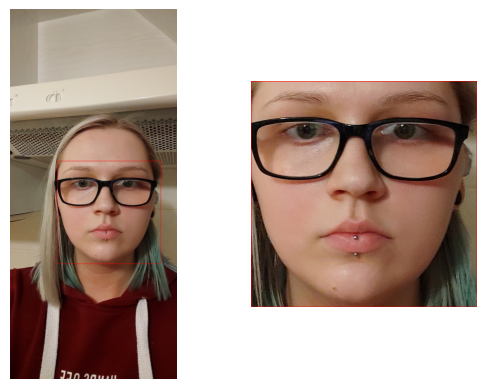

In [14]:

if MODE_MP:
	img = detector.read_from_file(f'../{dataset.path.sample(1).iloc[0]}')
	detections = detector(img)
	img = np.copy(img.numpy_view())
else: 
	img = cv2.cvtColor(cv2.imread(dataset.path.sample(1).iloc[0]), cv2.COLOR_RGB2BGR)
	detections = detector(img)

det = detections[0]

x,y,w,h = det

cv2.rectangle(img, (x, y), (x+w, y+h), (255,0,0), 3)
plt.figure()
plt.subplot(1,2,1)
plt.imshow(img)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(img[y:y+h,x:x+w])
plt.axis('off')

In [16]:
# create paths for output
if not os.path.exists(DATASET_OUTPUT.data): os.makedirs(DATASET_OUTPUT.data)
if not os.path.exists(os.path.join(DATASET_OUTPUT.data, 'rejected')): os.makedirs(os.path.join(DATASET_OUTPUT.data, 'rejected'))

# create dataset
faces_dataset = pd.DataFrame(columns=dataset.columns)

count = 0
def process(entry):
	global count
	
	if MODE_MP:
		img = detector.read_from_file(f'../{entry.path}')
		detections = detector(img)
		img = cv2.cvtColor(img.numpy_view(), cv2.COLOR_RGB2BGR)
	else:
		img = cv2.imread(entry.path)
		detections = detector(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
	

	if len(detections) <= 0: # no face detected
		print(entry.path)
		cv2.imwrite(os.path.join(DATASET_OUTPUT.data, 'rejected',f'{count:03}.png'), img)
		count+=1
		return

	# extract values
	x,y,w,h = detections[0]
	
	# add entry to dataset & save image to directory
	faces_dataset.loc[len(faces_dataset)] = [ entry.setid,os.path.join(DATASET_OUTPUT.data, f'{count:03}.png')]

	cv2.imwrite(os.path.join(DATASET_OUTPUT.data, f'{count:03}.png'), img[y:y+h,x:x+w])

	count+=1

if ERROR_IGNORE: sys.stderr = open(os.devnull, 'w')
dataset.apply(process, axis=1) # apply function
if ERROR_IGNORE: sys.stderr = sys.__stderr__

faces_dataset.to_csv(DATASET_OUTPUT.info, index=False) # save dataset to csv

data/dataset/Selfies ID Images dataset\Caucasians\0001ca9b9a--61ab21f4277a1c323b746383_age_23_name_Andrea Ran/ID_2.jpg
data/dataset/Selfies ID Images dataset\Caucasians\0001ca9b9a--61ab3a5fd6d182382f20a168_age_61_name_Paolo/ID_2.jpg
data/dataset/Selfies ID Images dataset\Caucasians\0001ca9b9a--61ab3a5fd6d182382f20a168_age_61_name_Paolo/Selfie_13.jpg
data/dataset/Selfies ID Images dataset\Caucasians\0001ca9b9a--61ab3a5fd6d182382f20a168_age_61_name_Paolo/Selfie_4.jpg
data/dataset/Selfies ID Images dataset\Caucasians\0001ca9b9a--61ab3a5fd6d182382f20a168_age_61_name_Paolo/Selfie_8.jpg
data/dataset/Selfies ID Images dataset\Caucasians\0001ca9b9a--61ab3a5fd6d182382f20a168_age_61_name_Paolo/Selfie_7.jpg
data/dataset/Selfies ID Images dataset\Caucasians\0001ca9b9a--61ab3a5fd6d182382f20a168_age_61_name_Paolo/Selfie_6.jpg
data/dataset/Selfies ID Images dataset\Caucasians\0001ca9b9a--61ab3a5fd6d182382f20a168_age_61_name_Paolo/Selfie_2.jpg
data/dataset/Selfies ID Images dataset\Caucasians\0001ca9b